In [1]:
## Load in needed mods
import pandas as pd, numpy as np, glob
from Bio.Seq import Seq
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
## Set path to long COA and load
longCOApath = '../GENOTYPE/GENES/P19/CNAG_01836-t26_1.csv.gz'
longCOA = pd.read_csv(longCOApath)

## If negatively oriented, complement and flip
if longCOA.Strand.max()<0:
    longCOA = longCOA[::-1]
    longCOA['Ref'] = [Seq(s).complement()[0] for s in longCOA.Ref.tolist()]
    longCOA['Alt'] = [Seq(s).complement()[0] for s in longCOA.Alt.tolist()]

## Add zero position
longCOA['Zeropos'] = np.abs(longCOA.Pos - longCOA.Pos.tolist()[0])+1

## reset variant column
longCOA['Isvar'] = 0
longCOA.loc[(longCOA.Ref!=longCOA.Alt),'Isvar']=1

## View head
longCOA.head()

,Pos,Ref,Alt,Isvar,Strand,Type,Phase,Gene,Sample,Zeropos
0,1042367,A,A,0,1,0,0,CNAG_01836-t26_1,19,1
1,1042368,T,T,0,1,0,0,CNAG_01836-t26_1,19,2
2,1042369,G,G,0,1,0,0,CNAG_01836-t26_1,19,3
3,1042370,A,A,0,1,0,0,CNAG_01836-t26_1,19,4
4,1042371,C,C,0,1,0,0,CNAG_01836-t26_1,19,5


In [4]:
## View start codon
longCOA[(longCOA.Type==0)].head()

,Pos,Ref,Alt,Isvar,Strand,Type,Phase,Gene,Sample,Zeropos
0,1042367,A,A,0,1,0,0,CNAG_01836-t26_1,19,1
1,1042368,T,T,0,1,0,0,CNAG_01836-t26_1,19,2
2,1042369,G,G,0,1,0,0,CNAG_01836-t26_1,19,3
3,1042370,A,A,0,1,0,0,CNAG_01836-t26_1,19,4
4,1042371,C,C,0,1,0,0,CNAG_01836-t26_1,19,5


In [5]:
## View stop-codon
longCOA[(longCOA.Type==0)].tail()

,Pos,Ref,Alt,Isvar,Strand,Type,Phase,Gene,Sample,Zeropos
1891,1044258,A,A,0,1,0,0,CNAG_01836-t26_1,19,1892
1892,1044259,T,T,0,1,0,0,CNAG_01836-t26_1,19,1893
1893,1044260,T,T,0,1,0,0,CNAG_01836-t26_1,19,1894
1894,1044261,A,A,0,1,0,0,CNAG_01836-t26_1,19,1895
1895,1044262,A,A,0,1,0,0,CNAG_01836-t26_1,19,1896


In [6]:
## Where is this gene on the chromosome?
longCOA.Pos.min(),longCOA.Pos.max()

(1042367, 1044262)

In [7]:
## Gather reference allele (H99)
ref = Seq(''.join(longCOA[(longCOA.Type==0) & (longCOA.Ref!='.')].Ref.tolist()))

## Translate the allele 
refaa = ref.translate()

## Count stop-codons and print length of ref
list(refaa).count('*'),len(refaa)

(1, 522)

In [8]:
## Gather alternative allele (Bt65)
alt = Seq(''.join(longCOA[(longCOA.Type==0) & (longCOA.Alt!='.')].Alt.tolist()))

## Translate
altaa = alt.translate()

## Count stop-codons and print length
list(altaa).count('*'),len(altaa)

(2, 522)

In [11]:
## Find this index of the non-sense mutation
difix = altaa.index('*')
difix

503

In [12]:
## View the amino acids around the above index
## Set the number of codons around it
na = 3
refaa[difix-na:difix+na],altaa[difix-na:difix+na]

(Seq('FPKWIV'), Seq('FPK*IV'))

In [13]:
## slice coding regions
cds = longCOA[(longCOA.Type==0)].copy()

## Add ref and alt amino acids
cds['Refaa'] = np.concatenate([np.repeat(a,3) for a in refaa])
cds['Altaa'] = np.concatenate([np.repeat(a,3) for a in altaa])

In [14]:
## Find the relative position of new stop codon
zp = cds[(cds.Altaa=='*')].Zeropos.min()
zp

1840

In [15]:
## Mannually set the codons to plot
to_plot = cds[(cds.Zeropos>=zp-(3*3)) & (cds.Zeropos<zp+(3*3))]

## View dataframe
to_plot

,Pos,Ref,Alt,Isvar,Strand,Type,Phase,Gene,Sample,Zeropos,Refaa,Altaa
1830,1044197,T,T,0,1,0,0,CNAG_01836-t26_1,19,1831,F,F
1831,1044198,T,T,0,1,0,0,CNAG_01836-t26_1,19,1832,F,F
1832,1044199,C,C,0,1,0,0,CNAG_01836-t26_1,19,1833,F,F
1833,1044200,C,C,0,1,0,0,CNAG_01836-t26_1,19,1834,P,P
1834,1044201,C,C,0,1,0,0,CNAG_01836-t26_1,19,1835,P,P
1835,1044202,T,T,0,1,0,0,CNAG_01836-t26_1,19,1836,P,P
1836,1044203,A,A,0,1,0,0,CNAG_01836-t26_1,19,1837,K,K
1837,1044204,A,A,0,1,0,0,CNAG_01836-t26_1,19,1838,K,K
1838,1044205,A,A,0,1,0,0,CNAG_01836-t26_1,19,1839,K,K
1839,1044206,T,T,0,1,0,0,CNAG_01836-t26_1,19,1840,W,*


In [16]:
## Load in amino acid color map
aadf = pd.read_csv('../DATA/AA_color_df.csv',index_col=0).T

## add in a color for k
aadf[aadf.T.index.values[-1]+1] = ['K','tab:blue']
aadf = aadf.T

## view tail
aadf.tail()

,AA,Color
15,T,#1A1DE2
16,V,#95CE53
17,Y,#232273
18,W,#392923
19,K,tab:blue


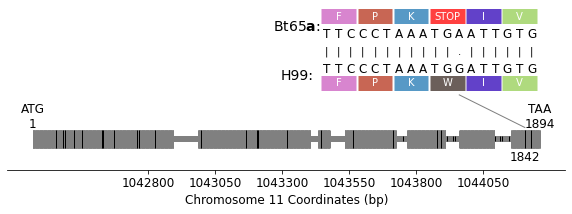

In [17]:
## Set figure
fig, ax = plt.subplots(1,1,figsize=(10,3))
fig.set_facecolor('w')

## Plot gene body
plt.hlines(0,longCOA.Zeropos.min(),longCOA.Zeropos.max(),color='grey',linewidth=6);

## Plot exons
for i,j in cds.iterrows():
    plt.vlines(j.Zeropos,-1,1,color='grey',alpha=1,linewidth=1)
    
## Plot variants  
## Variants not in exons
gvs = longCOA[(longCOA.Isvar==1) & (longCOA.Type!=0)]
for i,j in gvs.iterrows():
    if j.Ref!=j.Alt:
        plt.vlines(j.Zeropos,0.35,-0.25,color='k',linewidth=1)

## Variant in exons
gvs = longCOA[(longCOA.Isvar==1) & (longCOA.Type==0)]
for i,j in gvs.iterrows():
    if j.Ref!=j.Alt:
        plt.vlines(j.Zeropos,1,-1,color='k',linewidth=1)
        
## Plot sequences
## Set plotting variables for annotation of amino acids
x = 1100
ys = 0.7
y1 = 8
y2 = y1+2.5
tw = 45
xpad = 20

## Initialize lists
plotpos = []
difpos = []

## Iterate over codons and sequence to plot
for i,(ri,p) in enumerate(to_plot.iterrows()):
    
    ## Set the x postion and append
    xp = x+(i*tw)
    plotpos.append(xp)
    
    ## Annotate the reference allele  
    plt.text(xp,y=y1+ys,s=Seq(p.Ref),fontsize=12,color='k',va='top',ha='center')
    
    ## Annotate the alternatve allele
    plt.text(xp,y=y2+ys,s=Seq(p.Alt),fontsize=12,color='k',va='bottom',ha='center')
    
    ## draw line connecting alleles if equal, else use a dot for variant
    plt.text(xp,y=(y1+((y2-y1)/2))+ys+0.02,s='|' if p.Alt==p.Ref else '.',fontsize=10,color='k',va='center',ha='center')
    
    ## if allele don't match append dif position
    if p.Alt!=p.Ref:
        difpos.append(xp)
    
## Plot the reference amino acid sequence
for i,a in enumerate(to_plot.Refaa.tolist()[::3]):  
    
    ## draw the rectagle representing the amino acid
    plt.hlines(y1-1.6,plotpos[::3][i]-xpad,plotpos[2::3][i]+xpad,linewidth=15,alpha=0.75,color=aadf[(aadf.AA==a)].Color)

    ## Annotate the amino acid
    plt.text(plotpos[1::3][i],y=y1-1.6,s=a,color='w',va='center',ha='center')

## Plot the alternative amino acid sequence
for i,a in enumerate(to_plot.Altaa.tolist()[::3]):

    ## draw the rectagle representing the amino acid
    plt.hlines(y2+3.4,plotpos[::3][i]-xpad,plotpos[2::3][i]+xpad,linewidth=15,alpha=0.75,color=aadf[(aadf.AA==a)].Color)
    
    ## annotate the amino acid
    plt.text(plotpos[1::3][i],y=y2+3.4,s=a if a != '*' else 'STOP',color='w',va='center',ha='center')

## Gather xticks    
x_xp,x_xl = plt.xticks()

## Gather gene position values
pos = longCOA[(longCOA.Zeropos.isin(x_xp[(x_xp>=500) & (x_xp<=longCOA.Zeropos.max())]))].Pos.values

## Set relative position values
zeropos = longCOA[(longCOA.Zeropos.isin(x_xp[(x_xp>=500) & (x_xp<=longCOA.Zeropos.max())]))].Zeropos.values

## gather a new x positon modification
newxmod = int(str(pos[0])[-2:])

## addjust xticks and set x-axis lables
plt.xticks(zeropos-newxmod , pos-newxmod ,fontsize=12)
plt.xlabel('Chromosome 11 Coordinates (bp)',fontsize=12)

## Annotate start and stop codons
## The start
plt.text(cds.Zeropos.min()+1,2.5,'ATG\n%s'%cds.Zeropos.min(),va='center',ha='center',fontsize=12)

## The stop
plt.text(cds.Zeropos.max()-1,2.5,'TAA\n%s'%str(cds.Zeropos.max()-2),va='center',ha='center',fontsize=12)

## Set y-axis limits
plt.ylim(-3.5,15);

## Turn off top, left and right spines
[ax.spines[a].set_visible(False) for a in ['top','left','right']]

## Remove yticks
plt.yticks([])

## Annotate H99 and Bt65 strain lables
plt.text(x-2.5*tw,y1,'H99:',fontsize=14,va='top',ha='center')
plt.text(x-2.5*tw,y2+1.5,r'Bt65$\bf{a}$:',fontsize=14,va='bottom',ha='center')

## Annotate nonsense mutation
plt.text(cds[(cds.Altaa=='*')].Zeropos[:3].max(),-2,'%s'%cds[(cds.Altaa=='*')].Zeropos[:3].max(),va='center',ha='center',fontsize=12)

## plot a line between nonsnese mutation and amino acid in H99
plt.plot([cds[(cds.Altaa=='*')].Zeropos.min(),np.max(difpos)],[1.3,y1-3],color='k',alpha=0.5,linewidth=1);

## Set title (or dont')
#plt.title('longCOA',x=0.1,y=0.8,fontstyle='italic',color='grey',fontsize=14)

## save figure
plt.savefig('../FIGURES/longCOA_Bt65vsH99.pdf',dpi=400,bbox_inches='tight');

In [21]:
## Check our work
assert np.max([np.unique([len(a) for a in longCOA.Ref]),np.unique([len(a) for a in longCOA.Alt])])==1